In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import pickle
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
# ML module
import sklearn
from sklearn.model_selection import train_test_split ## splite data into train data and validation data
from sklearn.preprocessing import StandardScaler     
from sklearn.metrics import r2_score                 
from sklearn.metrics import mean_squared_error
# # change cell width
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))
import warnings
warnings.simplefilter("ignore")

In [2]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         # Currently, memory growth needs to be the same across GPUs
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#         print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#     except RuntimeError as e:
#         # Memory growth must be set before GPUs have been initialized
#         print(e)

In [3]:
import random as rn
def reset_seed(seed=0):
    os.environ['PYTHONHASHSEED'] = '0'
    rn.seed(seed) # random関数のシードを固定
    np.random.seed(seed) # numpyのシードを固定
    tf.random.set_seed(seed) # tensorflowのシードを固定

In [4]:
reset_seed(1234)

In [5]:
data_dir = r'..\..\..\MonitoringAI_CPW/DataForLC4122'
data_filelist = os.listdir(data_dir)
file_num = len(data_filelist)
print("file_num:",file_num)
print(data_filelist)

# Read Data and Integrate into 1 Data Frame
df_raw = pd.DataFrame()
for i_file in range(file_num):
    file_dir = data_dir + "/" + data_filelist[i_file]
    print(file_dir)
    df_tmp = pd.read_pickle(file_dir)
    df_raw = pd.concat([df_raw, df_tmp])
#df_raw.reset_index(drop=True, inplace=True)
print("df_raw.shape:", df_raw.shape)

file_num: 4
['Data_for_LC4122_2019May_01.pkl', 'Data_for_LC4122_2019May_02.pkl', 'Data_for_LC4122_2020May_01.pkl', 'Data_for_LC4122_2020May_02.pkl']
..\..\..\MonitoringAI_CPW/DataForLC4122/Data_for_LC4122_2019May_01.pkl
..\..\..\MonitoringAI_CPW/DataForLC4122/Data_for_LC4122_2019May_02.pkl
..\..\..\MonitoringAI_CPW/DataForLC4122/Data_for_LC4122_2020May_01.pkl
..\..\..\MonitoringAI_CPW/DataForLC4122/Data_for_LC4122_2020May_02.pkl
df_raw.shape: (104544, 126)


In [6]:
df_raw.describe()

,TI_4124.PV,LC_4103.PV,LC_4105.PV,LC_4105.OP,PC_4108.PV,TI_4127.PV,LC_4109.PV,TI_4128.PV,FI_4118.PV,TI_4132.PV,...,AI_41022.PV,FI_4134.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,PQ_62003.PV,PQ_62004.PV,FC_61001.PV,HC_4113.OP,TI_4191.PV
count,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,...,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000,104544.000000
mean,194.440653,50.001477,50.007954,66.565525,0.749653,35.656119,51.280961,36.179282,2.536206,172.706264,...,915.335098,193.035065,198.212041,69.466919,1.401965,1.974172,14.497242,1.915641,28.014503,123.522204
std,5.367484,0.139716,0.151537,5.567857,0.002462,1.468653,1.943102,1.216772,1.158368,5.742548,...,9.292111,38.457161,39.153015,5.452587,0.135701,4.224577,23.184534,7.910790,16.231399,5.705647
min,179.314401,47.393826,47.450492,56.455698,0.728190,29.634540,45.292550,31.784720,-1.360000,147.766395,...,901.828518,87.860959,75.277957,58.939056,1.088079,0.000000,0.000000,0.000000,2.000000,113.377097
25%,190.241182,49.933164,49.924103,60.513294,0.747696,34.841004,49.887143,35.451360,1.884481,168.069685,...,906.645327,159.648441,163.639567,64.944241,1.277790,0.000000,0.000000,0.000000,8.000000,118.343705
50%,195.805241,50.005467,50.007601,67.686630,0.749420,35.650445,50.235104,36.229019,2.523659,173.863012,...,915.058831,187.620539,191.496270,67.464692,1.422094,0.000000,0.000000,0.000000,40.000000,122.907328
75%,198.455717,50.080259,50.090148,72.354533,0.751630,36.625245,53.061539,36.996421,3.430732,176.951263,...,923.455877,227.667478,232.680434,73.069755,1.537541,0.000000,22.062031,0.000000,40.000008,127.678249
max,205.354576,51.631202,51.497367,74.467506,0.759148,39.914119,57.815092,39.719572,5.378221,184.688933,...,932.401434,292.311146,298.143588,85.788182,1.760869,17.546152,80.364068,48.888487,44.000008,135.517021


In [7]:
df = df_raw.copy()
df.dropna(inplace=True)
#df.reset_index(inplace=True, drop=True)
df

,TI_4124.PV,LA_4104.PV,LC_4103.PV,LC_4105.PV,LC_4105.OP,PC_4108.PV,TI_4127.PV,LC_4109.PV,TI_4128.PV,FI_4118.PV,...,AI_41022.PV,FI_4134.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,PQ_62003.PV,PQ_62004.PV,FC_61001.PV,HC_4113.OP,TI_4191.PV
2019-05-01 00:00:00.000,202.242560,No Data,50.061960,50.025492,69.595662,0.748848,36.132194,50.393790,37.062906,4.097109,...,929.102911,235.166480,235.934739,77.860523,1.415826,11.482975,0.000000,0.0,40.000000,126.420289
2019-05-01 00:01:00.000,202.240708,No Data,50.061987,50.025221,69.596725,0.748796,36.131781,50.363165,37.062700,4.121668,...,928.857495,229.399628,227.125639,77.869501,1.417093,11.558095,0.000000,0.0,40.000000,126.423393
2019-05-01 00:02:00.000,202.238855,No Data,50.062013,50.024950,69.597787,0.748743,36.131367,50.070462,37.062493,4.104595,...,929.662665,224.134619,220.003934,77.878478,1.410930,11.579905,0.000000,0.0,40.000000,126.426497
2019-05-01 00:03:00.000,202.237003,No Data,50.062039,50.024679,69.598850,0.748691,36.130953,49.777760,37.062286,4.015203,...,930.557910,220.125496,218.667736,77.887455,1.380622,11.581520,0.000000,0.0,40.000000,126.429601
2019-05-01 00:04:00.000,202.235151,No Data,50.062066,50.024408,69.599912,0.748639,36.130540,49.498105,37.062080,3.973136,...,930.287557,221.412111,221.334246,77.896432,1.360123,11.618677,0.000000,0.0,40.000000,126.432706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-06 07:07:00.010,191.991722,No Data,50.023234,49.951533,68.075372,0.746473,35.411320,50.374341,35.645434,3.031001,...,910.819057,158.407988,172.776334,65.985922,1.286606,0.000000,57.105960,0.0,2.000008,119.929089
2020-06-06 07:08:00.010,191.992856,No Data,50.022987,49.950962,68.074217,0.746968,35.416028,50.651506,35.647302,3.042972,...,910.349055,159.003746,174.870244,65.815574,1.280209,0.000000,57.580172,0.0,2.000008,119.927035
2020-06-06 07:09:00.010,191.993991,No Data,50.022739,49.950391,68.073061,0.747462,35.420736,50.501987,35.649170,3.052855,...,909.998732,155.514082,165.496125,65.922098,1.312143,0.000000,58.143523,0.0,2.000008,119.924982
2020-06-06 07:10:00.010,191.995125,No Data,50.022492,49.949819,68.071905,0.747957,35.425443,50.126418,35.651038,3.054714,...,910.672073,153.565557,158.550993,66.063117,1.337849,0.000000,58.465217,0.0,2.000008,119.922928


In [8]:
# change "string" to "NaN"
df_PAS_required_removeString = []
for col in df.columns[:]:
    remove_string = pd.to_numeric(df[col], errors='coerce')
    df_PAS_required_removeString.append(remove_string)
    
pd.DataFrame(df_PAS_required_removeString).T

,TI_4124.PV,LA_4104.PV,LC_4103.PV,LC_4105.PV,LC_4105.OP,PC_4108.PV,TI_4127.PV,LC_4109.PV,TI_4128.PV,FI_4118.PV,...,AI_41022.PV,FI_4134.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,PQ_62003.PV,PQ_62004.PV,FC_61001.PV,HC_4113.OP,TI_4191.PV
2019-05-01 00:00:00.000,202.242560,NaN,50.061960,50.025492,69.595662,0.748848,36.132194,50.393790,37.062906,4.097109,...,929.102911,235.166480,235.934739,77.860523,1.415826,11.482975,0.000000,0.0,40.000000,126.420289
2019-05-01 00:01:00.000,202.240708,NaN,50.061987,50.025221,69.596725,0.748796,36.131781,50.363165,37.062700,4.121668,...,928.857495,229.399628,227.125639,77.869501,1.417093,11.558095,0.000000,0.0,40.000000,126.423393
2019-05-01 00:02:00.000,202.238855,NaN,50.062013,50.024950,69.597787,0.748743,36.131367,50.070462,37.062493,4.104595,...,929.662665,224.134619,220.003934,77.878478,1.410930,11.579905,0.000000,0.0,40.000000,126.426497
2019-05-01 00:03:00.000,202.237003,NaN,50.062039,50.024679,69.598850,0.748691,36.130953,49.777760,37.062286,4.015203,...,930.557910,220.125496,218.667736,77.887455,1.380622,11.581520,0.000000,0.0,40.000000,126.429601
2019-05-01 00:04:00.000,202.235151,NaN,50.062066,50.024408,69.599912,0.748639,36.130540,49.498105,37.062080,3.973136,...,930.287557,221.412111,221.334246,77.896432,1.360123,11.618677,0.000000,0.0,40.000000,126.432706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-06 07:07:00.010,191.991722,NaN,50.023234,49.951533,68.075372,0.746473,35.411320,50.374341,35.645434,3.031001,...,910.819057,158.407988,172.776334,65.985922,1.286606,0.000000,57.105960,0.0,2.000008,119.929089
2020-06-06 07:08:00.010,191.992856,NaN,50.022987,49.950962,68.074217,0.746968,35.416028,50.651506,35.647302,3.042972,...,910.349055,159.003746,174.870244,65.815574,1.280209,0.000000,57.580172,0.0,2.000008,119.927035
2020-06-06 07:09:00.010,191.993991,NaN,50.022739,49.950391,68.073061,0.747462,35.420736,50.501987,35.649170,3.052855,...,909.998732,155.514082,165.496125,65.922098,1.312143,0.000000,58.143523,0.0,2.000008,119.924982
2020-06-06 07:10:00.010,191.995125,NaN,50.022492,49.949819,68.071905,0.747957,35.425443,50.126418,35.651038,3.054714,...,910.672073,153.565557,158.550993,66.063117,1.337849,0.000000,58.465217,0.0,2.000008,119.922928


In [9]:
# remove "NaN" row
df_dropna = pd.DataFrame(df_PAS_required_removeString).T.dropna(how="any", axis=1)
print(df_dropna.shape)
df_dropna

(104544, 114)


,TI_4124.PV,LC_4103.PV,LC_4105.PV,LC_4105.OP,PC_4108.PV,TI_4127.PV,LC_4109.PV,TI_4128.PV,FI_4118.PV,TI_4132.PV,...,AI_41022.PV,FI_4134.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,PQ_62003.PV,PQ_62004.PV,FC_61001.PV,HC_4113.OP,TI_4191.PV
2019-05-01 00:00:00.000,202.242560,50.061960,50.025492,69.595662,0.748848,36.132194,50.393790,37.062906,4.097109,180.396483,...,929.102911,235.166480,235.934739,77.860523,1.415826,11.482975,0.000000,0.0,40.000000,126.420289
2019-05-01 00:01:00.000,202.240708,50.061987,50.025221,69.596725,0.748796,36.131781,50.363165,37.062700,4.121668,180.404547,...,928.857495,229.399628,227.125639,77.869501,1.417093,11.558095,0.000000,0.0,40.000000,126.423393
2019-05-01 00:02:00.000,202.238855,50.062013,50.024950,69.597787,0.748743,36.131367,50.070462,37.062493,4.104595,180.412612,...,929.662665,224.134619,220.003934,77.878478,1.410930,11.579905,0.000000,0.0,40.000000,126.426497
2019-05-01 00:03:00.000,202.237003,50.062039,50.024679,69.598850,0.748691,36.130953,49.777760,37.062286,4.015203,180.420676,...,930.557910,220.125496,218.667736,77.887455,1.380622,11.581520,0.000000,0.0,40.000000,126.429601
2019-05-01 00:04:00.000,202.235151,50.062066,50.024408,69.599912,0.748639,36.130540,49.498105,37.062080,3.973136,180.428740,...,930.287557,221.412111,221.334246,77.896432,1.360123,11.618677,0.000000,0.0,40.000000,126.432706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-06 07:07:00.010,191.991722,50.023234,49.951533,68.075372,0.746473,35.411320,50.374341,35.645434,3.031001,171.222115,...,910.819057,158.407988,172.776334,65.985922,1.286606,0.000000,57.105960,0.0,2.000008,119.929089
2020-06-06 07:08:00.010,191.992856,50.022987,49.950962,68.074217,0.746968,35.416028,50.651506,35.647302,3.042972,171.223301,...,910.349055,159.003746,174.870244,65.815574,1.280209,0.000000,57.580172,0.0,2.000008,119.927035
2020-06-06 07:09:00.010,191.993991,50.022739,49.950391,68.073061,0.747462,35.420736,50.501987,35.649170,3.052855,171.224488,...,909.998732,155.514082,165.496125,65.922098,1.312143,0.000000,58.143523,0.0,2.000008,119.924982
2020-06-06 07:10:00.010,191.995125,50.022492,49.949819,68.071905,0.747957,35.425443,50.126418,35.651038,3.054714,171.225675,...,910.672073,153.565557,158.550993,66.063117,1.337849,0.000000,58.465217,0.0,2.000008,119.922928


In [10]:
# explanatory variable - given
list_x = [
    'FC_4121.PV',
    'FC_4137.PV',
    'TI_4144.PV',
    'PC_4112.PV',
    'FC_4125.PV',
    'FC_4126.PV',
    'FI_4117.PV',
    'AI_41022.PV',
    'FSI4135.PV' 
]

# Target variable
list_y = [
    'LC_4122.PV' 
]

# Removing Outliers

In [11]:
# There are two peaks in the AI_41022.PV histogram, there is a risk of data generated from different distributions, 
# so need to consider dividing them into different AI models.
# CASE - B
df_dropna = df_dropna[df_dropna['AI_41022.PV'] >= 915]

In [12]:
# Removing Outliers of the certain tag no. which have been mentioned by Toki-san

outliner = ['TI_4144.PV']

Q1 = []
Q3 = []
for tag in df.loc[:, outliner].columns:
    q_1 = df[tag].quantile(0.25)
    Q1.append(q_1)
    q_3 = df[tag].quantile(0.75)
    Q3.append(q_3)

IQR = [x-y for (x, y) in zip(Q3, Q1)]

Lower = []
Higher = []
for count, tag in enumerate(df.loc[:, outliner].columns):
    l = Q1[count] - (2 * IQR[count])
    Lower.append(l)
    h = Q3[count] + (2 * IQR[count])
    Higher.append(h)

    
print("Q1:    ", Q1)
print("Q3:    ", Q3)
print("IQR:   ", IQR)
print("Lower: ", Lower)
print("Higher:", Higher)

Q1:     [346.20794677685626]
Q3:     [347.73474012520944]
IQR:    [1.5267933483531806]
Lower:  [343.1543600801499]
Higher: [350.7883268219158]


TI_4144.PV Raw Data General info:
 count    104367.000000
mean        346.971220
std           1.123264
min         343.170644
25%         346.213251
50%         346.907471
75%         347.736609
max         350.740775
Name: TI_4144.PV, dtype: float64


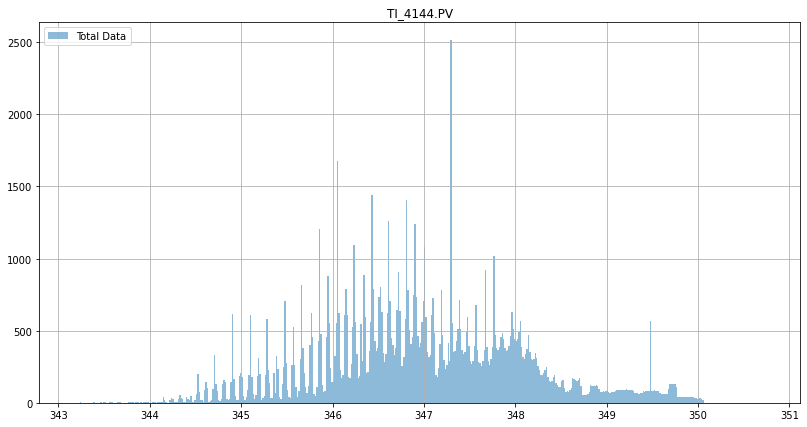

In [13]:
import math

for n, tag in enumerate(df.loc[:, outliner].columns):
    df = df[(df[tag] >= Lower[n]) & (df[tag] <= Higher[n])]

df.dropna(inplace=True)
num_row = math.ceil(len(df.loc[:, outliner].columns) / 2)
i = 0

for tag in df.loc[:, outliner].columns:
    i += 1
    plt.figure(figsize=(30, 7 * num_row))
    plt.subplot(num_row, 2, i)
    n_raw, bins_raw, patches_raw = plt.hist(x=df[tag], bins= 500, alpha=0.5, label="Total Data")
    plt.legend(loc="upper left")
    plt.grid()
    plt.title(label=tag)
    print(tag, 'Raw Data General info:\n', f"{df[tag].describe()}")
    plt.show()

In [14]:
# CASE - B
# First 10% of Data shall be Trial, and Last 90% of data shall be Train

Total_Data = df_dropna.shape[0]
print('Total Data 100%: ', Total_Data)
Train_Data = Total_Data * 0.9
Train_Data = int(Train_Data)
print('Train Data 90%:  ', Train_Data)
Trial_Data = Total_Data - Train_Data
print('Trial Data 10%:  ', Trial_Data)

Total Data 100%:  52284
Train Data 90%:   47055
Trial Data 10%:   5229


In [15]:
# First 10% of Data shall be Trial
df_trial = df_dropna[:Trial_Data]
df_trial

,TI_4124.PV,LC_4103.PV,LC_4105.PV,LC_4105.OP,PC_4108.PV,TI_4127.PV,LC_4109.PV,TI_4128.PV,FI_4118.PV,TI_4132.PV,...,AI_41022.PV,FI_4134.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,PQ_62003.PV,PQ_62004.PV,FC_61001.PV,HC_4113.OP,TI_4191.PV
2019-05-01 00:00:00.000,202.242560,50.061960,50.025492,69.595662,0.748848,36.132194,50.393790,37.062906,4.097109,180.396483,...,929.102911,235.166480,235.934739,77.860523,1.415826,11.482975,0.0,0.0,40.0,126.420289
2019-05-01 00:01:00.000,202.240708,50.061987,50.025221,69.596725,0.748796,36.131781,50.363165,37.062700,4.121668,180.404547,...,928.857495,229.399628,227.125639,77.869501,1.417093,11.558095,0.0,0.0,40.0,126.423393
2019-05-01 00:02:00.000,202.238855,50.062013,50.024950,69.597787,0.748743,36.131367,50.070462,37.062493,4.104595,180.412612,...,929.662665,224.134619,220.003934,77.878478,1.410930,11.579905,0.0,0.0,40.0,126.426497
2019-05-01 00:03:00.000,202.237003,50.062039,50.024679,69.598850,0.748691,36.130953,49.777760,37.062286,4.015203,180.420676,...,930.557910,220.125496,218.667736,77.887455,1.380622,11.581520,0.0,0.0,40.0,126.429601
2019-05-01 00:04:00.000,202.235151,50.062066,50.024408,69.599912,0.748639,36.130540,49.498105,37.062080,3.973136,180.428740,...,930.287557,221.412111,221.334246,77.896432,1.360123,11.618677,0.0,0.0,40.0,126.432706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-04 15:04:00.001,196.696358,50.187937,49.942913,64.210648,0.751496,38.263978,49.703963,37.703731,3.371031,176.941593,...,927.857078,181.931706,183.291833,76.924768,1.523199,0.000000,0.0,0.0,44.0,130.710693
2019-05-04 15:05:00.001,196.682325,50.188724,49.942023,64.215051,0.751596,38.274689,49.682088,37.713525,3.324630,176.944731,...,927.352073,183.451860,188.941274,76.589802,1.501662,0.000000,0.0,0.0,44.0,130.715235
2019-05-04 15:06:00.001,196.668292,50.189511,49.941134,64.219454,0.751696,38.285401,49.616306,37.723318,3.277531,176.947869,...,926.847068,188.949527,194.989671,76.308009,1.486335,0.000000,0.0,0.0,44.0,130.719777
2019-05-04 15:07:00.001,196.654259,50.190299,49.940244,64.223857,0.751797,38.296112,49.550523,37.733111,3.230432,176.951007,...,926.463168,201.468541,201.038068,76.717412,1.500452,0.000000,0.0,0.0,44.0,130.724319


In [16]:
# First 90% of data shall be train
df_train = df_dropna[Trial_Data:]
df_train

,TI_4124.PV,LC_4103.PV,LC_4105.PV,LC_4105.OP,PC_4108.PV,TI_4127.PV,LC_4109.PV,TI_4128.PV,FI_4118.PV,TI_4132.PV,...,AI_41022.PV,FI_4134.PV,FSI4135.PV,TI_4151.PV,PCX4129.PV,PQ_62003.PV,PQ_62004.PV,FC_61001.PV,HC_4113.OP,TI_4191.PV
2019-05-04 15:09:00.001,196.626192,50.191873,49.938464,64.232663,0.751997,38.317536,49.418958,37.752697,3.136234,176.957283,...,927.880851,197.180402,200.849861,76.924747,1.533214,0.000000,0.0,0.0,44.000000,130.733403
2019-05-04 15:10:00.001,196.612159,50.192661,49.937575,64.237065,0.752098,38.328247,49.358063,37.761872,3.139110,176.960421,...,927.575824,189.974354,196.465944,76.348543,1.543456,0.000000,0.0,0.0,44.000000,130.737945
2019-05-04 15:11:00.001,196.598126,50.193448,49.936685,64.241468,0.752198,38.338959,49.521946,37.763019,3.233936,176.963559,...,927.129985,187.083937,190.604580,76.368506,1.533749,0.000000,0.0,0.0,44.000000,130.742487
2019-05-04 15:12:00.001,196.584093,50.194236,49.935795,64.245871,0.752297,38.348849,49.802835,37.761696,3.287586,176.966697,...,927.575847,185.847882,186.599565,76.571893,1.522507,0.000000,0.0,0.0,44.000000,130.747029
2019-05-04 15:13:00.001,196.570060,50.195023,49.934905,64.250274,0.752102,38.348055,49.846947,37.760373,3.261798,176.969835,...,928.126468,187.483091,187.296167,76.775280,1.511265,0.000000,0.0,0.0,44.000000,130.751570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-01 12:10:00.009,195.553458,49.869365,50.185531,64.152889,0.752893,35.525477,50.433689,36.935100,0.950618,173.802212,...,915.500136,197.163625,187.053333,69.850428,1.408418,9.447008,0.0,0.0,2.000008,120.397395
2020-06-01 12:11:00.009,195.611239,49.869586,50.186303,64.153586,0.752935,35.524792,50.467595,36.935420,1.175061,173.882919,...,915.362978,184.788204,201.323360,70.305866,1.434758,9.496704,0.0,0.0,2.000008,120.421464
2020-06-01 12:12:00.009,195.669020,49.869806,50.187075,64.154283,0.752976,35.524108,50.501502,36.935740,1.328675,173.963626,...,915.225819,177.067585,207.590496,70.881180,1.455953,9.529175,0.0,0.0,2.000008,120.445534
2020-06-01 12:13:00.009,195.726801,49.870027,50.187847,64.154980,0.753018,35.523424,50.535408,36.936060,1.346530,174.044333,...,915.088660,178.517017,193.085846,70.761112,1.451384,9.554603,0.0,0.0,2.000008,120.469603


In [17]:
train_index, trial_index = df_train.index, df_trial.index
print('** train = {} / trial = {}'.format(len(train_index),len(trial_index)))

** train = 47055 / trial = 5229


In [18]:
# train and validation data
df_X = df_train[list_x] # Feature
df_y = df_train.loc[:,list_y] # Target

In [19]:
# trial data
df_X_trial = df_trial[list_x] # Feature
df_y_trial = df_trial.loc[:,list_y] # target

# Test Data Range Visualization

Size Comparison 

Train Data Size 47055 → Trial Data Size 5229 

LC_4122.PV , Train / Trial, minimum value:  4.61e+01 → 4.09e+01
LC_4122.PV , Train / Trial, mode:           5.01e+01 → 5.01e+01
LC_4122.PV , Train / Trial, median:         5.00e+01 → 5.00e+01
LC_4122.PV , Train / Trial, mean:           4.99e+01 → 5.00e+01
LC_4122.PV , Train / Trial, Maximum value:  5.39e+01 → 5.65e+01 



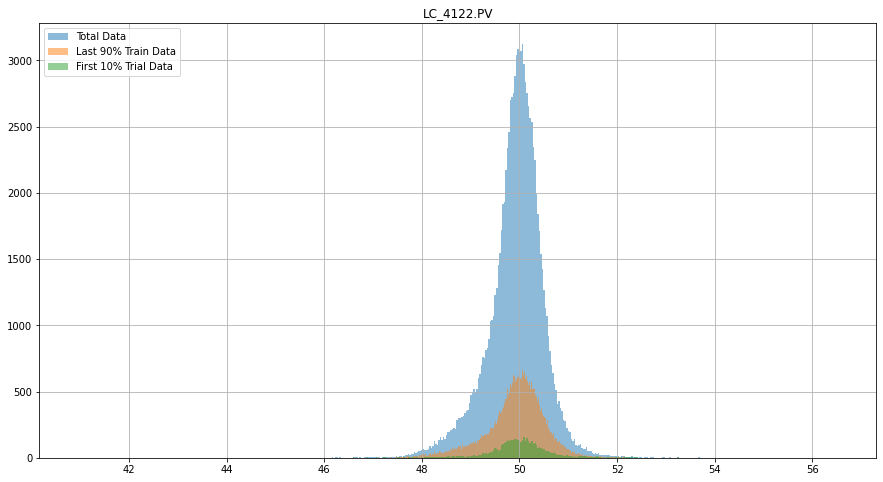

In [20]:
# For Target_tag Comparison
Target_tag = list_y #'LC_4122.PV'

print("Size Comparison","\n")
print("Train Data Size", df_y.shape[0], "→", "Trial Data Size", df_y_trial.shape[0],"\n")

# Comparison graph
plt.figure(figsize=(15, 8))

for tag in df.loc[:, Target_tag].columns:
    
    n_raw, bins_raw, patches_raw = plt.hist(x=df[tag], bins= 500, alpha=0.5, label="Total Data")
    n_train, bins_train, patches_train = plt.hist(x=df_y[tag], bins= 500, alpha= 0.5, label="Last 90% Train Data")
    n, bins, patches = plt.hist(df_y_trial[tag], bins= 500, alpha=0.5, label="First 10% Trial Data")
    plt.legend(loc="upper left")
    plt.grid()
    plt.title(label=tag)
    mode_index_train = n_train.argmax()
    mode_index = n.argmax()
    print(tag, ', Train / Trial, minimum value: ', f"{df_y[tag].min():.2e}", "→", f"{df_y_trial[tag].min():.2e}")
    print(tag, ', Train / Trial, mode:          ', f"{(bins_train[mode_index_train] + bins_train[mode_index_train+1])/2:.2e}", "→", f"{(bins[mode_index] + bins[mode_index+1])/2:.2e}")
    print(tag, ', Train / Trial, median:        ', f"{df_y[tag].median():.2e}", "→", f"{df_y_trial[tag].median():.2e}")
    print(tag, ', Train / Trial, mean:          ', f"{df_y[tag].mean():.2e}", "→", f"{df_y_trial[tag].mean():.2e}")
    print(tag, ', Train / Trial, Maximum value: ', f"{df_y[tag].max():.2e}", "→", f"{df_y_trial[tag].max():.2e}","\n")
plt.show()

Size Comparison 

Train Data Size 47055 → Trial Data Size 5229 

FC_4121.PV , Train / Trial, minimum value:  4.56e+01 → 4.27e+01
FC_4121.PV , Train / Trial, mode:           5.09e+01 → 7.65e+01
FC_4121.PV , Train / Trial, median:         5.31e+01 → 7.62e+01
FC_4121.PV , Train / Trial, mean:           6.23e+01 → 7.20e+01
FC_4121.PV , Train / Trial, Maximum value:  1.10e+02 → 7.95e+01 



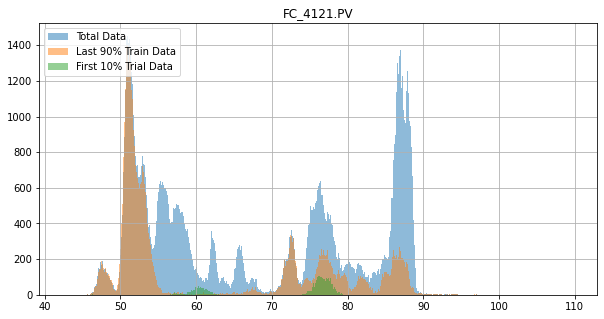

FC_4137.PV , Train / Trial, minimum value:  2.99e+00 → 3.39e+00
FC_4137.PV , Train / Trial, mode:           3.10e+00 → 4.55e+00
FC_4137.PV , Train / Trial, median:         3.20e+00 → 4.55e+00
FC_4137.PV , Train / Trial, mean:           3.74e+00 → 4.26e+00
FC_4137.PV , Train / Trial, Maximum value:  5.21e+00 → 4.56e+00 



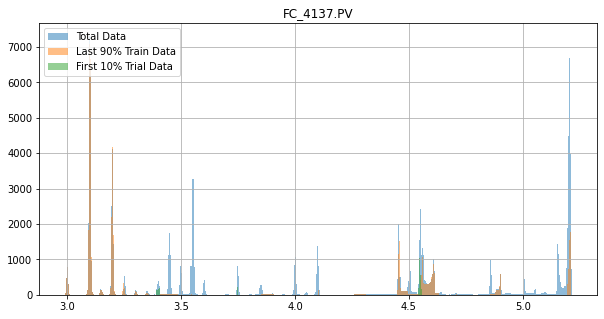

TI_4144.PV , Train / Trial, minimum value:  3.41e+02 → 3.37e+02
TI_4144.PV , Train / Trial, mode:           3.47e+02 → 3.48e+02
TI_4144.PV , Train / Trial, median:         3.47e+02 → 3.47e+02
TI_4144.PV , Train / Trial, mean:           3.47e+02 → 3.47e+02
TI_4144.PV , Train / Trial, Maximum value:  3.52e+02 → 3.49e+02 



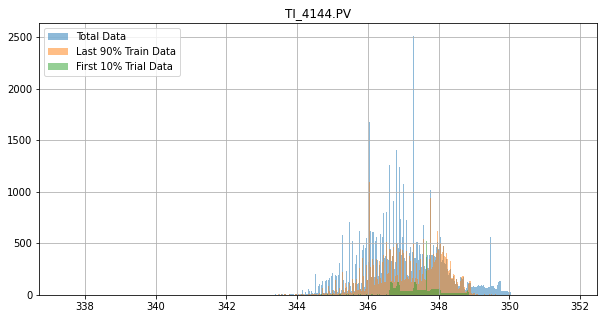

PC_4112.PV , Train / Trial, minimum value:  6.29e-02 → 6.65e-02
PC_4112.PV , Train / Trial, mode:           7.11e-02 → 7.10e-02
PC_4112.PV , Train / Trial, median:         7.15e-02 → 7.10e-02
PC_4112.PV , Train / Trial, mean:           7.14e-02 → 7.10e-02
PC_4112.PV , Train / Trial, Maximum value:  7.75e-02 → 7.58e-02 



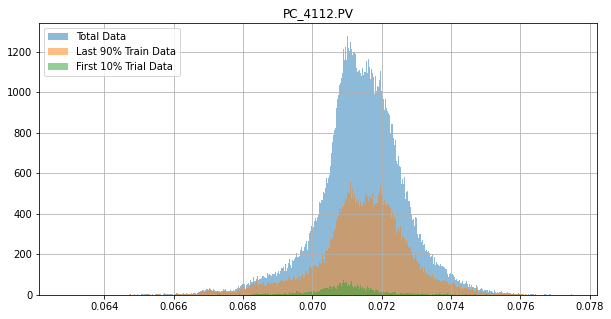

FC_4125.PV , Train / Trial, minimum value:  2.24e+01 → 2.83e+01
FC_4125.PV , Train / Trial, mode:           4.29e+01 → 4.31e+01
FC_4125.PV , Train / Trial, median:         3.53e+01 → 4.32e+01
FC_4125.PV , Train / Trial, mean:           3.62e+01 → 4.07e+01
FC_4125.PV , Train / Trial, Maximum value:  5.26e+01 → 4.66e+01 



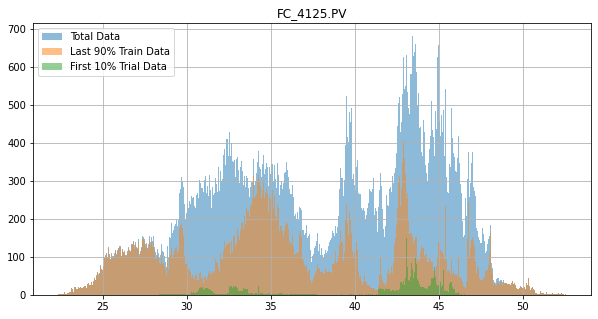

FC_4126.PV , Train / Trial, minimum value:  2.38e+01 → 3.36e+01
FC_4126.PV , Train / Trial, mode:           3.91e+01 → 3.40e+01
FC_4126.PV , Train / Trial, median:         3.47e+01 → 4.30e+01
FC_4126.PV , Train / Trial, mean:           3.63e+01 → 4.11e+01
FC_4126.PV , Train / Trial, Maximum value:  5.33e+01 → 4.54e+01 



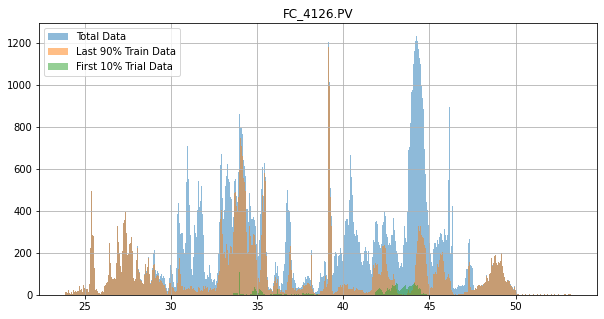

FI_4117.PV , Train / Trial, minimum value:  0.00e+00 → 0.00e+00
FI_4117.PV , Train / Trial, mode:           4.14e-02 → 4.13e+01
FI_4117.PV , Train / Trial, median:         0.00e+00 → 2.32e+01
FI_4117.PV , Train / Trial, mean:           6.95e+00 → 2.24e+01
FI_4117.PV , Train / Trial, Maximum value:  4.14e+01 → 4.14e+01 



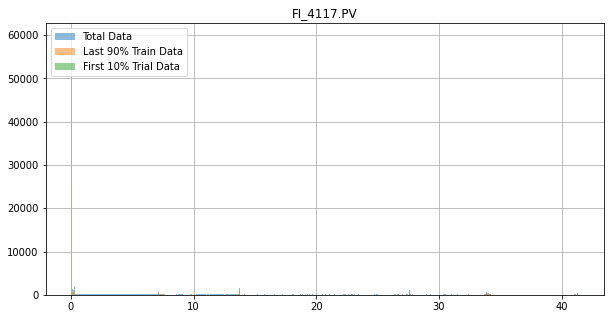

AI_41022.PV , Train / Trial, minimum value:  9.15e+02 → 9.22e+02
AI_41022.PV , Train / Trial, mode:           9.21e+02 → 9.29e+02
AI_41022.PV , Train / Trial, median:         9.23e+02 → 9.28e+02
AI_41022.PV , Train / Trial, mean:           9.24e+02 → 9.28e+02
AI_41022.PV , Train / Trial, Maximum value:  9.32e+02 → 9.31e+02 



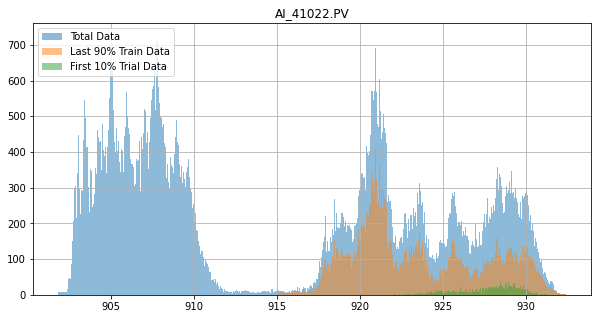

FSI4135.PV , Train / Trial, minimum value:  1.07e+02 → 7.53e+01
FSI4135.PV , Train / Trial, mode:           1.64e+02 → 2.23e+02
FSI4135.PV , Train / Trial, median:         1.65e+02 → 2.20e+02
FSI4135.PV , Train / Trial, mean:           1.88e+02 → 2.10e+02
FSI4135.PV , Train / Trial, Maximum value:  2.98e+02 → 2.46e+02 



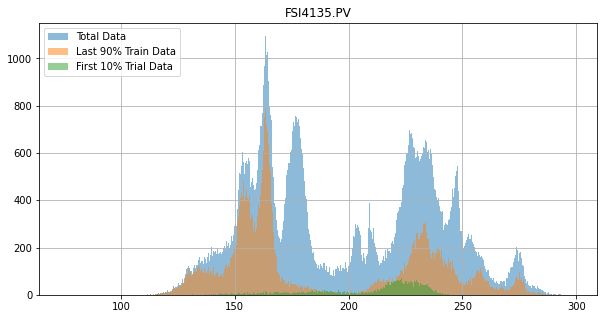

In [21]:
# For Target_tag Comparison
Target_tag = list_x #'LC_4122.PV'

print("Size Comparison","\n")
print("Train Data Size", df_X.shape[0], "→", "Trial Data Size", df_X_trial.shape[0],"\n")

# Comparison graph

for tag in df.loc[:, Target_tag].columns:
    
    plt.figure(figsize=(10, 5))
    n_raw, bins_raw, patches_raw = plt.hist(x=df[tag], bins= 500, alpha=0.5, label="Total Data")
    n_train, bins_train, patches_train = plt.hist(x=df_X[tag], bins= 500, alpha= 0.5, label="Last 90% Train Data")
    n, bins, patches = plt.hist(df_X_trial[tag], bins= 500, alpha=0.5, label="First 10% Trial Data")
    plt.legend(loc="upper left")
    plt.grid()
    plt.title(label=tag)
    mode_index_train = n_train.argmax()
    mode_index = n.argmax()
    print(tag, ', Train / Trial, minimum value: ', f"{df_X[tag].min():.2e}", "→", f"{df_X_trial[tag].min():.2e}")
    print(tag, ', Train / Trial, mode:          ', f"{(bins_train[mode_index_train] + bins_train[mode_index_train+1])/2:.2e}", "→", f"{(bins[mode_index] + bins[mode_index+1])/2:.2e}")
    print(tag, ', Train / Trial, median:        ', f"{df_X[tag].median():.2e}", "→", f"{df_X_trial[tag].median():.2e}")
    print(tag, ', Train / Trial, mean:          ', f"{df_X[tag].mean():.2e}", "→", f"{df_X_trial[tag].mean():.2e}")
    print(tag, ', Train / Trial, Maximum value: ', f"{df_X[tag].max():.2e}", "→", f"{df_X_trial[tag].max():.2e}","\n")
    plt.show()

# Standalize Data

In [22]:
# standalize train and validation data (X & y)
sc_X_train = StandardScaler()
sc_y_train = StandardScaler()

In [23]:
train_X_std = sc_X_train.fit_transform(df_X.values)
train_y_std = sc_y_train.fit_transform(df_y.values.reshape(-1,1))

In [24]:
trial_X_std = sc_X_train.transform(df_X_trial.values)
trial_y_std = sc_y_train.transform(df_y_trial.values.reshape(-1, 1))

### Visualize Training Data

In [25]:
col_y = df_y.columns.tolist()
col_x = df_X.columns.tolist()
print(col_y)
print(col_x)

['LC_4122.PV']
['FC_4121.PV', 'FC_4137.PV', 'TI_4144.PV', 'PC_4112.PV', 'FC_4125.PV', 'FC_4126.PV', 'FI_4117.PV', 'AI_41022.PV', 'FSI4135.PV']


===== LC_4122.PV : [-14.377 - 10.597] =====


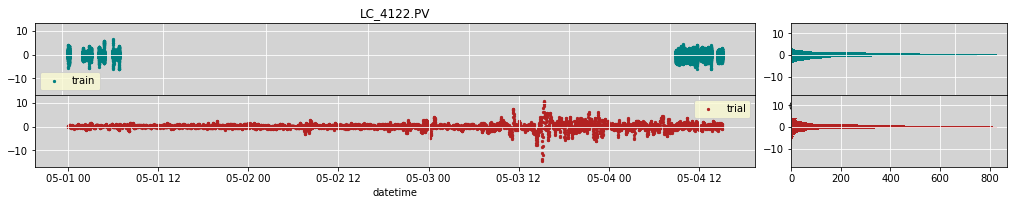

===== FC_4121.PV : [-1.408 - 3.387] =====


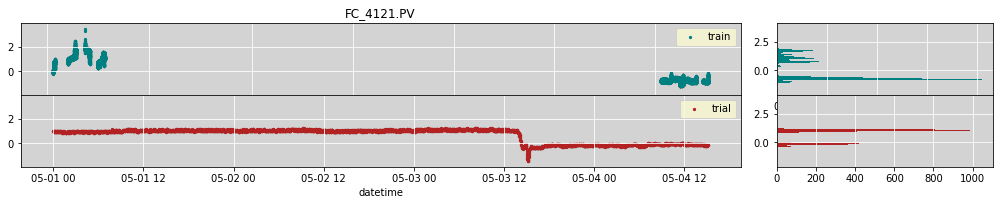

===== FC_4137.PV : [-0.950 - 1.853] =====


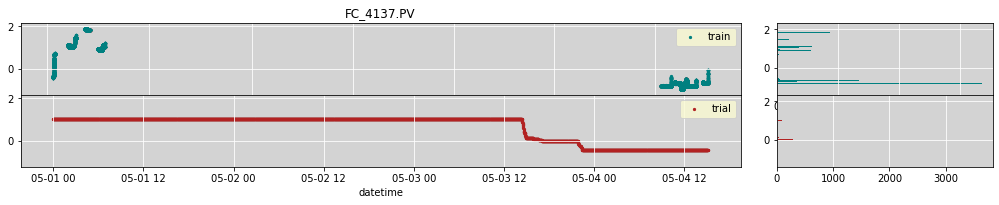

===== TI_4144.PV : [-10.403 - 5.049] =====


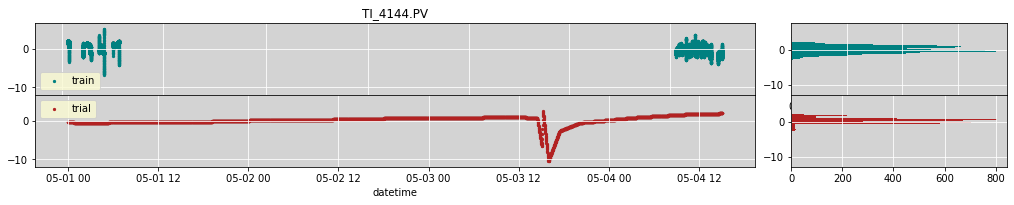

===== PC_4112.PV : [-6.236 - 4.379] =====


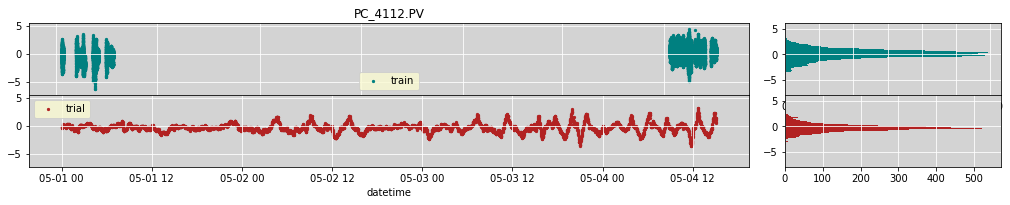

===== FC_4125.PV : [-2.065 - 2.425] =====


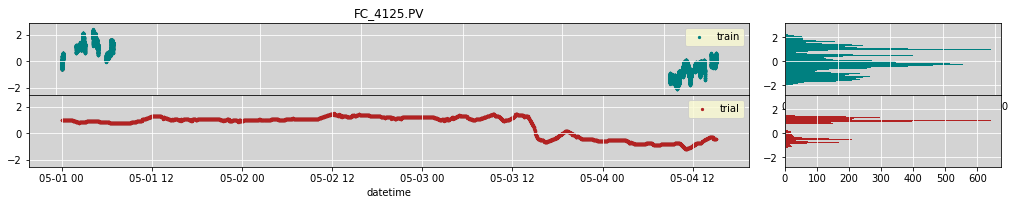

===== FC_4126.PV : [-1.808 - 2.474] =====


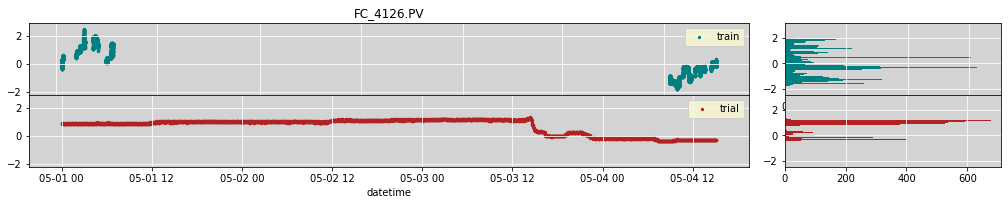

===== FI_4117.PV : [-0.606 - 2.998] =====


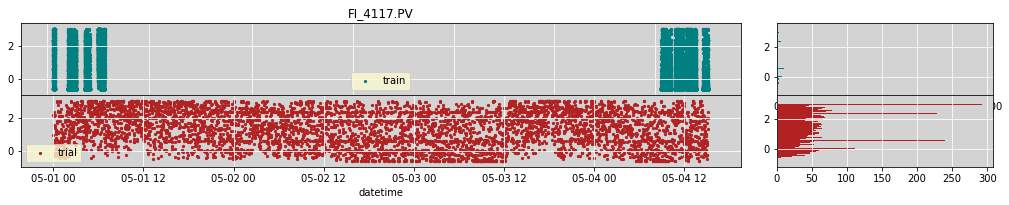

===== AI_41022.PV : [-2.209 - 2.239] =====


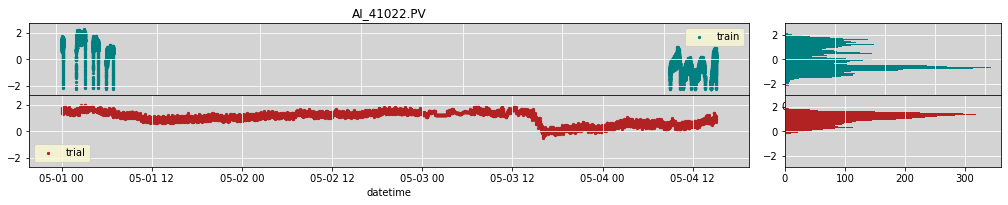

===== FSI4135.PV : [-2.644 - 2.569] =====


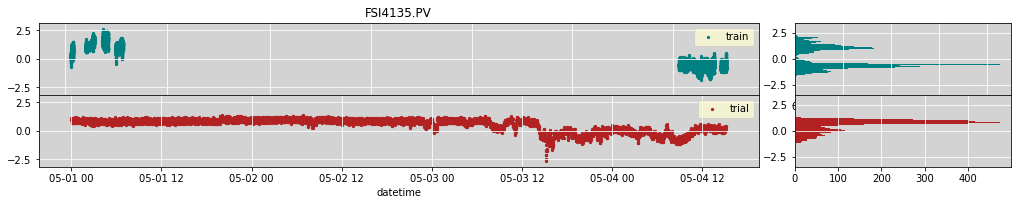

===== Check Outlier Feature Samples =====


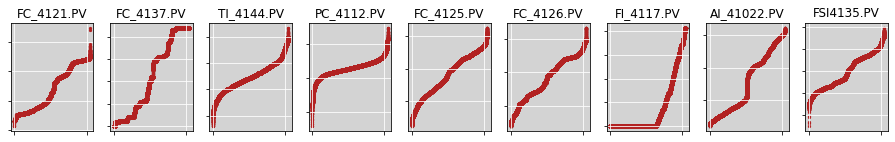

In [26]:
import math
from sklearn.preprocessing import MinMaxScaler

plt.rcParams['axes.facecolor'] = 'lightgrey'
plt.rcParams['legend.facecolor'] = 'lightgoldenrodyellow'
plt.rcParams['grid.color'] = 'white'


def create_multi_axis_free(block_fig_size, n_block, axis_margin):
    
    # block で指定したサイズのaxisを複数生成
    
    figsize_x_max = 18
    margin_x, margin_y = axis_margin[0], axis_margin[1]
    n_block_x, n_y = n_block[0], n_block[1]
    n_axis_block = len(block_fig_size)    

    # create axis 4 corner positions in block
    axis_in_block = []
    bottom_,left_, height_max = margin_y, margin_x, 0  
    for k in range(n_axis_block):
        width_, height_ = block_fig_size[k][0],block_fig_size[k][1]
        axis_corner = [left_,bottom_,width_, height_]
        axis_in_block.append(axis_corner)
        height_max = max(height_max, height_)
        left_ += (margin_x+width_)
    block_sizeX, block_sizeY = left_+margin_x,height_max+margin_y
    
    axis_pos_lst = []
    for i in range(n_y):
        add_bottom = block_sizeY*i
        for j in range(n_block_x):
            add_left = block_sizeX*j
            for k in range(n_axis_block): # X方向に継ぎ足し
                lst = axis_in_block[k]
                axis_corner = [lst[0]+add_left,lst[1]+add_bottom,lst[2],lst[3]]
                axis_pos_lst.append(axis_corner)
    last_axis = axis_pos_lst[-1]
    fig_sizeX = last_axis[0]+last_axis[2]+margin_x
    fig_sizeY = last_axis[1]+last_axis[3]+margin_y
    figx = min(figsize_x_max,fig_sizeX)
    figy = fig_sizeY*figx/fig_sizeX
    
    axis_lst = []
    fig = plt.figure(figsize = (figx,figy))
    # print(fig.get_size_inches())
    for i in range(len(axis_pos_lst)):
        axis_ = axis_pos_lst[i]
        # print('* axis before adjust [left_,bottom_,width_, height_] : ',axis_)
        axis_ = [axis_[0]/fig_sizeX, 1 - axis_[1]/fig_sizeY, axis_[2]/fig_sizeX, axis_[3]/fig_sizeY]
        # print('* axis after adjust [left_,bottom_,width_, height_] : ',axis_)
        ax_ = plt.axes(axis_)
        axis_lst.append(ax_)

    del axis_in_block,axis_pos_lst
    
    return fig, axis_lst


def visualize_trend_histgram_sigle(df,ax1,ax2,color_,draw_type='scatter',hist_bins=50):
    
    if (draw_type=='scatter'):
        ax1.scatter(df.index,df,s=s_size,color=color_)
    elif (draw_type=='plot'):
        ax1.plot(df.index,df_plot_data,linewidth=2,color=color_)
    ax1.grid(True)
    ax1.set_xlabel('datetime')
    ax2.hist(df.iloc[:,0],bins=hist_bins,orientation='horizontal', color=color_)
    ax2.grid(True)

    return ax1, ax2

# def : =================================================


# Visualize Data
scaler_taget = MinMaxScaler().fit(np.concatenate([train_y_std, trial_y_std]))
scaler_feature = MinMaxScaler().fit(np.concatenate([train_X_std, trial_X_std]))
s_size = 10
for i in range(2):
    # i=0 : target,  i=1 : feature
    if (i==0): # Target
        train_, trial_, col = train_y_std, trial_y_std, df_y.columns.tolist()
        scaler_ = scaler_taget
    else:
        train_, trial_, col = train_X_std, trial_X_std, df_X.columns.tolist()
        scaler_ = scaler_feature
    n_plot = len(col)
    for j in range(n_plot):
        col_ = col[j]
        min_, max_ = scaler_.data_min_[j], scaler_.data_max_[j]
        print('===== {} : [{:.3f} - {:.3f}] ====='.format(col_,min_,max_))
        min_ = min_ - (max_ - min_)*0.1
        max_ = max_ + (max_ - min_)*0.1
        y_range = [min_, max_]
        fig, axis_lst = create_multi_axis_free([[10,1],[3,1]],[1,2],[0.5,0])
        for k in range(2): # k=0 : train,  k=1 : trial
            if (k==0):
                y_, index_, color_, label_, s_ = train_[:,j], train_index, 'teal', 'train', 5
            else:
                y_, index_, color_, label_, s_ = trial_[:,j], trial_index, 'firebrick', 'trial', 5
            
            axis_trend = axis_lst[2*k] # for history
            axis_trend.scatter(index_,y_,s=s_,color=color_,label=label_)
            axis_trend.grid(True)
            axis_trend.legend(loc='best')
            axis_trend.set_ylim(y_range)
            if (k==0):
                axis_trend.set_title(col_)
            elif (k==1):
                axis_trend.set_xlabel('datetime')
            axis_hist = axis_lst[2*k+1] # for histogram
            axis_hist.hist(y_,bins=100,range=y_range,orientation='horizontal',color=color_,label=label_)
            axis_hist.grid(True)
        plt.show()
    
del scaler_taget, scaler_feature
    
    
print('===== Check Outlier Feature Samples =====')
df_x_out = df.loc[:,list_x]
(n_row,n_col) = df_x_out.shape
n_axis_x, axis_size, color_ = 10, 1.5, 'firebrick'
n_axis_y = math.ceil(n_col/n_axis_x)
fig = plt.figure(figsize=((axis_size+0.25)*n_axis_x,(axis_size+0.5)*n_axis_y))
np_x = np.arange(0,n_row,1)
for i in range(n_col):
    plot_, col_ = df_x_out.iloc[:,i].sort_values(),df_x_out.columns[i]
    axis = plt.subplot(n_axis_y,n_axis_x,i+1)
    axis.scatter(np_x,plot_,s=5,color=color_)
    axis.grid(True)
    #axis.set_xlabel('order')
    #axis.set_ylabel('value')
    axis.set_title(col_)
    axis.tick_params(labelleft=False,labelbottom=False)
plt.show()

# Execute Neural Net Learning

In [27]:
#　Neural Net Module
import keras
from keras.layers.advanced_activations import LeakyReLU
from tensorflow.compat.v1.keras import backend as K
from keras.models import Sequential      ## Set NN model
from keras.layers import Dense, Dropout  ## Set Dense
from keras.optimizers import Adam        ## Set Optimization
from keras import regularizers           ## Set Regularizer
from keras.layers.normalization import BatchNormalization

In [28]:
x_input_shape = df_X.shape[1]
print('x_input_shape:', x_input_shape)
y_output_shape = df_y.shape[1]
print('y_output_shape:', y_output_shape)

x_input_shape: 9
y_output_shape: 1


In [29]:
###　Keras　###
# construct NN
def build_model():
    model = Sequential() ## Set NN model
    model.add(Dense(units=50, activation = 'relu', input_shape=(9,)))
    model.add(Dropout(0.3))
    model.add(Dense(units=100, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=200, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=100, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=50, activation = 'relu'))
    model.add(Dropout(0.3))
    model.add(Dense(units=1)) ## units = Target number
    model.compile(optimizer='adam', loss='mean_squared_error') ## set laerning process
    model.summary()
    return model

In [30]:
from sklearn.model_selection import KFold
from keras.callbacks import EarlyStopping

In [31]:
def NN_cross_validate(train_X, train_y, n_splits, epoch, kf_shuffle=False, trial=None, \
                      early_stopping = EarlyStopping(monitor='val_loss', min_delta=-0.0001, patience=200, verbose=0, mode='auto')):
    
    
    kf = KFold(n_splits=n_splits, shuffle=kf_shuffle)

    models, train_scores, validation_scores = [],[],[]
    
    # Add by TOKI =====
    trial_scores = []
    if (trial is None):
        trial_exists = False
    else:
        trial_exists = True
        trial_X, trial_y = trial[0], trial[1]
    # Add by TOKI =====
    
    # Add by TOKI =====
    model_id = 0
    # Add by TOKI =====

    for train_index, val_index in kf.split(train_X,train_y):
        
        # Add by TOKI =====
        model_id += 1
        print('\n# Training : Cross-Validation Model ID = {}\n'.format(model_id))
        # Add by TOKI =====

        train_data=train_X[train_index]
        train_label=train_y[train_index]
        val_data=train_X[val_index]
        val_label=train_y_std[val_index]

        model=build_model()
        history=model.fit(train_data,
                          train_label,
                          epochs=epoch,
                          batch_size=128,
                          validation_data=(val_data,val_label),
                          callbacks=[early_stopping],
                          verbose = 1
                         )

        models.append(model)

        loss=history.history['loss']
        val_loss=history.history['val_loss']

        # visualize learning curve
        x = history.epoch
        plt.plot(x, loss, label="loss")
        plt.plot(x, val_loss, label="val_loss")
        plt.title("Learning Curve")
        plt.legend(loc='best')
        plt.xlabel("epoch")
        plt.ylabel("MSE")
        plt.grid()
        plt.show()

        """ ### TOKI Comment : 同じ計算 (r2_score(y_true=train_label,...)を2回行っていて計算時間のロス
        pred_train_y_std = model.predict(train_data) ## predict target value by stadalized train data   
        print('R^2 train_std: %.3f' % r2_score(y_true=train_label, \
                                               y_pred=pred_train_y_std, multioutput='raw_values'))

        pred_val_y_std = model.predict(val_data) ## predict target value by stadalized validation data
        print('R^2 val_std: %.3f' % r2_score(y_true=val_label, \
                                             y_pred=pred_val_y_std, multioutput='raw_values'))
        """
        
        pred_train_y_std = model.predict(train_data) ## predict target value by stadalized train data 
        train_score = r2_score(y_true=train_label, y_pred=pred_train_y_std, multioutput='raw_values')
        print('R^2 train_std: %.3f' % train_score)
        train_scores.append(train_score)
        
        pred_val_y_std = model.predict(val_data) ## predict target value by stadalized validation data
        validation_score= r2_score(y_true=val_label, y_pred=pred_val_y_std, multioutput='raw_values') 
        print('R^2 val_std: %.3f' % validation_score)
        validation_scores.append(validation_score)
        
        # Add by TOKI =====
        if (trial_exists):
            pred_trial_y_std = model.predict(trial_X)
            trial_score = r2_score(y_true=trial_y, y_pred=pred_trial_y_std, multioutput='raw_values')
            trial_scores.append(trial_score)
        # Add by TOKI =====


    fig, ax1 = plt.subplots(figsize=(3, 3))
    x = list(range(len(models)))

    ax1.plot(x, train_scores,"-",label="train_scores", lw=1, marker='o', markersize=2, markeredgewidth=4) 
    ax1.plot(x, validation_scores,"-",label="validation_scores", alpha=0.8, lw=1, marker='o', markersize=2, markeredgewidth=4)
    
    # Add by TOKI =====
    if (trial_exists):
        ax1.plot(x, trial_scores,"-",label="trial_scores", alpha=0.8, lw=1.5, marker='o', \
                 markersize=2, markeredgewidth=4)

    #ax1.set_title('train_score vs validation_score')
    ax1.set_title('R2 Score of Model')
    ax1.set_xlabel('Various Data')
    ax1.set_ylabel('score')
    ax1.legend(loc='lower left', bbox_to_anchor=(1, 0))
    ax1.grid() ## Grid

    plt.show()
    return models


# Training : Cross-Validation Model ID = 1

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                500       
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (De

276/276 [==============================] - 1s 3ms/step - loss: 0.7780 - val_loss: 1.0584
Epoch 63/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7850 - val_loss: 0.9816
Epoch 64/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7768 - val_loss: 1.3566
Epoch 65/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7814 - val_loss: 1.1739
Epoch 66/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7790 - val_loss: 1.2393
Epoch 67/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7774 - val_loss: 1.0617
Epoch 68/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7813 - val_loss: 0.9780
Epoch 69/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7758 - val_loss: 2.0216
Epoch 70/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7815 - val_loss: 1.3097
Epoch 71/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7762 - v

276/276 [==============================] - 1s 3ms/step - loss: 0.7443 - val_loss: 1.2203
Epoch 142/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7435 - val_loss: 1.6853
Epoch 143/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7486 - val_loss: 1.1989
Epoch 144/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7445 - val_loss: 1.0489
Epoch 145/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7382 - val_loss: 1.0247
Epoch 146/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7419 - val_loss: 1.1017
Epoch 147/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7474 - val_loss: 1.1168
Epoch 148/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7477 - val_loss: 1.2392
Epoch 149/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7443 - val_loss: 1.1434
Epoch 150/1000
276/276 [==============================] - 1s 3ms/step - loss: 0

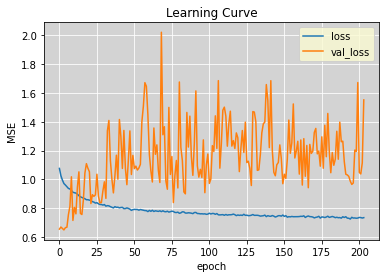

R^2 train_std: 0.396
R^2 val_std: -1.325

# Training : Cross-Validation Model ID = 2

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 50)                500       
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 100)               5100      
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
__________________________________

276/276 [==============================] - 1s 3ms/step - loss: 0.7843 - val_loss: 0.7760
Epoch 63/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7794 - val_loss: 0.7593
Epoch 64/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7825 - val_loss: 0.7468
Epoch 65/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7797 - val_loss: 0.7439
Epoch 66/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7818 - val_loss: 0.7395
Epoch 67/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7801 - val_loss: 0.7342
Epoch 68/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7785 - val_loss: 0.7511
Epoch 69/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7757 - val_loss: 0.7326
Epoch 70/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7735 - val_loss: 0.7527
Epoch 71/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7750 - v

276/276 [==============================] - 1s 3ms/step - loss: 0.7402 - val_loss: 0.7587
Epoch 142/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7358 - val_loss: 0.8053
Epoch 143/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7363 - val_loss: 0.7726
Epoch 144/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7379 - val_loss: 0.7944
Epoch 145/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7346 - val_loss: 0.7723
Epoch 146/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7361 - val_loss: 0.7632
Epoch 147/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7365 - val_loss: 0.7661
Epoch 148/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7382 - val_loss: 0.7991
Epoch 149/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7358 - val_loss: 0.7833
Epoch 150/1000
276/276 [==============================] - 1s 3ms/step - loss: 0

Epoch 220/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7132 - val_loss: 0.7664
Epoch 221/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.7193 - val_loss: 0.7629


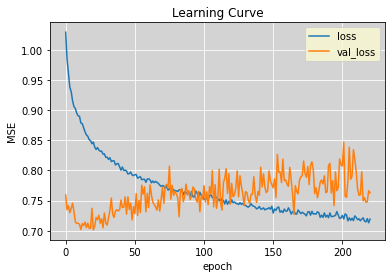

R^2 train_std: 0.387
R^2 val_std: 0.071

# Training : Cross-Validation Model ID = 3

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 50)                500       
_________________________________________________________________
dropout_10 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_11 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 200)               20200     
_________________________________________________________________
dropout_12 (Dropout)         (None, 200)               0         
___________________________________

276/276 [==============================] - 1s 3ms/step - loss: 0.6116 - val_loss: 1.3948
Epoch 63/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6135 - val_loss: 1.3704
Epoch 64/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6125 - val_loss: 1.3495
Epoch 65/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6112 - val_loss: 1.4874
Epoch 66/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6108 - val_loss: 1.4233
Epoch 67/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6061 - val_loss: 1.3914
Epoch 68/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6113 - val_loss: 1.4249
Epoch 69/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6071 - val_loss: 1.4040
Epoch 70/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6123 - val_loss: 1.3555
Epoch 71/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6124 - v

276/276 [==============================] - 1s 3ms/step - loss: 0.5908 - val_loss: 1.3961
Epoch 142/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.5856 - val_loss: 1.4041
Epoch 143/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.5900 - val_loss: 1.5287
Epoch 144/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.5861 - val_loss: 1.3590
Epoch 145/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.5939 - val_loss: 1.3379
Epoch 146/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.5904 - val_loss: 1.3309
Epoch 147/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.5829 - val_loss: 1.3741
Epoch 148/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.5886 - val_loss: 1.3917
Epoch 149/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.5824 - val_loss: 1.4672
Epoch 150/1000
276/276 [==============================] - 1s 3ms/step - loss: 0

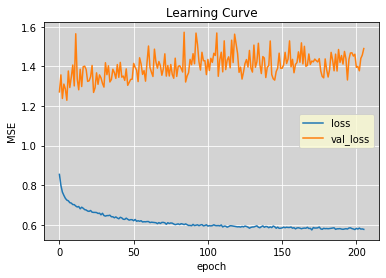

R^2 train_std: 0.423
R^2 val_std: -0.112

# Training : Cross-Validation Model ID = 4

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 50)                500       
_________________________________________________________________
dropout_15 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               5100      
_________________________________________________________________
dropout_16 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 200)               20200     
_________________________________________________________________
dropout_17 (Dropout)         (None, 200)               0         
__________________________________

276/276 [==============================] - 1s 3ms/step - loss: 0.6450 - val_loss: 1.3741
Epoch 63/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6376 - val_loss: 1.4516
Epoch 64/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6445 - val_loss: 1.3905
Epoch 65/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6427 - val_loss: 1.5569
Epoch 66/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6375 - val_loss: 1.5351
Epoch 67/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6394 - val_loss: 1.5067
Epoch 68/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6398 - val_loss: 1.5134
Epoch 69/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6363 - val_loss: 1.5145
Epoch 70/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6347 - val_loss: 1.4004
Epoch 71/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6354 - v

276/276 [==============================] - 1s 2ms/step - loss: 0.6126 - val_loss: 1.6086
Epoch 142/1000
276/276 [==============================] - 1s 2ms/step - loss: 0.6115 - val_loss: 1.5716
Epoch 143/1000
276/276 [==============================] - 1s 2ms/step - loss: 0.6172 - val_loss: 1.5565
Epoch 144/1000
276/276 [==============================] - 1s 2ms/step - loss: 0.6123 - val_loss: 1.4198
Epoch 145/1000
276/276 [==============================] - 1s 2ms/step - loss: 0.6146 - val_loss: 1.6007
Epoch 146/1000
276/276 [==============================] - 1s 2ms/step - loss: 0.6168 - val_loss: 1.5229
Epoch 147/1000
276/276 [==============================] - 1s 3ms/step - loss: 0.6195 - val_loss: 1.4583
Epoch 148/1000
276/276 [==============================] - 1s 2ms/step - loss: 0.6163 - val_loss: 1.4877
Epoch 149/1000
276/276 [==============================] - 1s 2ms/step - loss: 0.6136 - val_loss: 1.5973
Epoch 150/1000
276/276 [==============================] - 1s 2ms/step - loss: 0

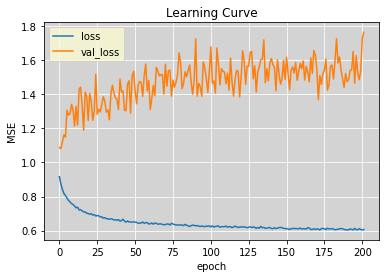

R^2 train_std: 0.413
R^2 val_std: -0.508


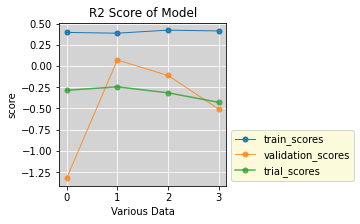

In [32]:
epoch, n_k = 1000, 4
models = NN_cross_validate(train_X_std, train_y_std, n_k, epoch, trial=[trial_X_std, trial_y_std])

In [33]:
# output ensemble mean value from rach models developed by cross-validation
def def_pred_ensemble(model, df_trial):
    sum_predictedValue = 0
    for i in range(len(model)):
        sum_predictedValue = sum_predictedValue + model[i].predict(df_trial)

    pred_ensemble = sum_predictedValue/len(model)
    return pred_ensemble

In [34]:
pred_ensemble = def_pred_ensemble(models, trial_X_std)
pred_ensemble

array([[-0.5304393 ],
       [-0.7315936 ],
       [-1.0698792 ],
       ...,
       [ 0.05301739],
       [ 0.01561779],
       [ 0.00376699]], dtype=float32)

In [35]:
def def_score_ensemble(model, df_trial_X, df_trial_y, target_unit): #(models, standarized_X, standarized_y)
    for i in range(len(models)):
        pred_train_y_std = models[i].predict(df_trial_X) ## predict target value by stadalized trial data
        print('R2 score_{}: %.3f'.format(i) % r2_score(y_true=df_trial_y,\
                                          y_pred=pred_train_y_std,\
                                          multioutput='raw_values'))        
        
        pred_train_y_inv = sc_y_train.inverse_transform(X=pred_train_y_std) ## inverse transform to before-standarized-pred_train_y
        true_train_y_inv = sc_y_train.inverse_transform(X=df_trial_y) ## inverse transform to before-standarized-pred_true_y       
        print('RMSE[{}]: %.3f'.format(target_unit) % np.sqrt(mean_squared_error(true_train_y_inv, pred_train_y_inv)))   
    
    # get ensmble score
    pred_ensemble = def_pred_ensemble(model, df_trial_X)
    train_score = r2_score(y_true = df_trial_y, \
                           y_pred = pred_ensemble,\
                           multioutput='raw_values')
    print('ensemble score: %.3f' %train_score)
    
    pred_train_y_inv = sc_y_train.inverse_transform(X=pred_ensemble)
    print('ensemble RMSE[{}]: %.3f'.format(target_unit) % np.sqrt(mean_squared_error(true_train_y_inv, pred_train_y_inv)))
    return 

In [36]:
print("R2 Score for Trial Dataset")
score_predictedEnsemble = def_score_ensemble(models, trial_X_std, trial_y_std.reshape(-1,1), "m3/h")

R2 Score for Trial Dataset
R2 score_0: -0.287
RMSE[m3/h]: 0.966
R2 score_1: -0.245
RMSE[m3/h]: 0.950
R2 score_2: -0.316
RMSE[m3/h]: 0.977
R2 score_3: -0.428
RMSE[m3/h]: 1.018
ensemble score: -0.239
ensemble RMSE[m3/h]: 0.948


In [37]:
select_model_id = -1 # selecet model_id you want to use. put "-1" if you want to use ensmble model

def calc_pred(models,select_model_id,df_x): # switch procedure depends on 1model or ensmble model
    if (select_model_id<0):
        pred_ = def_pred_ensemble(models,df_x)
    else:
        pred_ = models[select_model_id].predict(df_x)
    return pred_

# Predict target value with trial data

In [38]:
x = df_trial.index

In [39]:
pred_trial_y_std_ = calc_pred(models, select_model_id, trial_X_std) ## predict target value by stadalized trial data
pred_trial_y_inv = sc_y_train.inverse_transform(X=pred_trial_y_std_) ## inverse transform to before-standarized-pred_train_y

In [40]:
target_col, measure_unit = "LC_4122.PV", "[N3/h]"

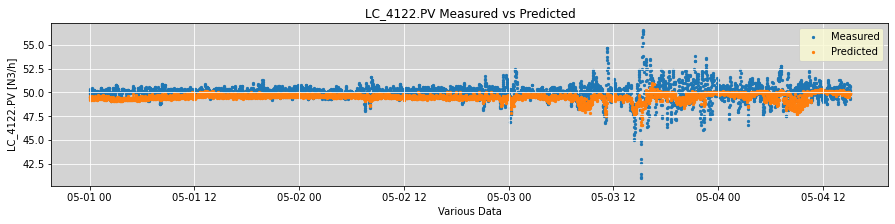

trial_score : -0.239
trial_RMSE: 0.948


In [41]:
# plot measured value and predicted value

fig = plt.figure(figsize=(15, 3))
plt.scatter(x,df_y_trial.values.reshape(-1,1),label="Measured", s=5)
plt.scatter(x,pred_trial_y_inv,label="Predicted", s=5)
plt.title('{} Measured vs Predicted'.format(target_col))
plt.xlabel('Various Data')
plt.ylabel(target_col+" "+measure_unit)
plt.legend(loc='best')
plt.grid()

plt.show()
print("trial_score : %.3f" % r2_score(y_true=df_y_trial.values.reshape(-1,1),\
                               y_pred=pred_trial_y_inv))
print('trial_RMSE: %.3f' % np.sqrt(mean_squared_error(y_true=df_y_trial.values.reshape(-1,1),\
                                                y_pred=pred_trial_y_inv)))

## Add by TOKI ===== add Error

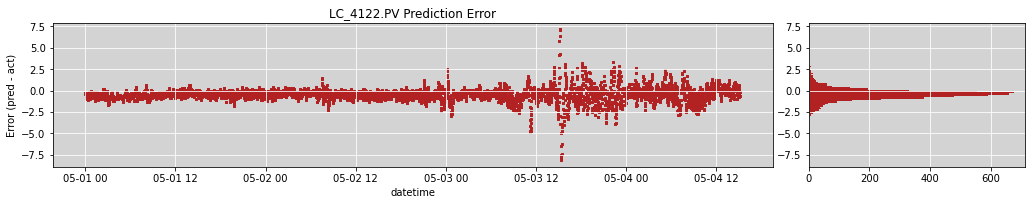

In [42]:
np_diff = pred_trial_y_inv - np.array(df_y_trial.values.reshape(-1,1))
color_ = 'firebrick'
fig, axis_lst = create_multi_axis_free([[10,2],[3,2]],[1,1],[0.5,0])
axis1 = axis_lst[0]
axis1.scatter(x,np_diff,s=2,label='diff',color=color_,marker='s')
axis1.set_xlabel('datetime')
axis1.set_ylabel('Error (pred - act)')
axis1.grid(True)
axis1.set_title('{} Prediction Error'.format(target_col))
axis2 = axis_lst[1]
axis2.hist(np_diff,bins=100,orientation='horizontal',color=color_)
axis2.grid(True)
plt.show()

In [43]:
df_diff = pd.DataFrame(np_diff)
df_diff.columns, df_diff.index = ['error'], x
df_diff.describe()

,error
count,5229.000000
mean,-0.458811
std,0.829406
min,-8.153305
25%,-0.778131
50%,-0.421753
75%,-0.120922
max,7.158719


# High Error Samples


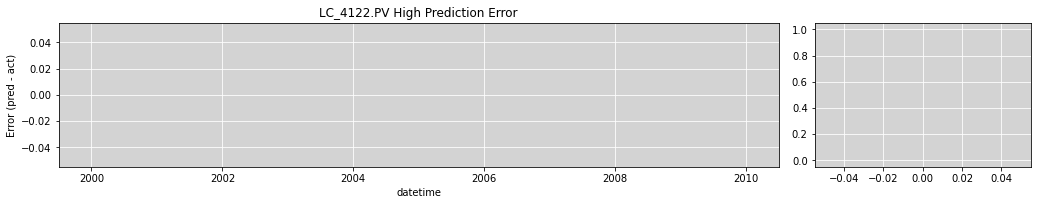

In [44]:
print('# High Error Samples')
error_thres = 30
lst_index = [i for i in range(df_diff.shape[0]) if abs(df_diff.iloc[i,0])>=error_thres]
n_high = len(lst_index)
if (n_high<20):
    for i in range(n_high):
        index_ = lst_index[i]
        print('{} : {} \t {}'.format(i,df_diff.index[index_],df_diff.iloc[index_,0]))
else:
    print('* n of high error : ',n_high)


df_diff_high = df_diff.iloc[lst_index,0]
color_ = 'firebrick'
fig, axis_lst = create_multi_axis_free([[10,2],[3,2]],[1,1],[0.5,0])
axis1 = axis_lst[0]
axis1.scatter(df_diff_high.index,df_diff_high,s=10,label='diff',color=color_,marker='s')
axis1.set_xlabel('datetime')
axis1.set_ylabel('Error (pred - act)')
axis1.grid(True)
axis1.set_title('{} High Prediction Error'.format(target_col))
axis2 = axis_lst[1]
axis2.hist(df_diff_high,bins=100,orientation='horizontal',color=color_)
axis2.grid(True)
plt.show()

In [45]:
def visualize_prediction_error(x,np_act,np_pred,col,measure_unit,error_thres=-9999):
    
    # actual & prediction
    fig = plt.figure(figsize=(15, 2))
    plt.scatter(x,np_act,label="act", s=5)
    plt.scatter(x,np_pred,label="pred", s=5)
    plt.title('{} Act vs Pred'.format(col))
    plt.xlabel('datetime')
    plt.ylabel(col+" "+measure_unit)
    plt.legend(loc='best')
    plt.grid()
    plt.show()
    
    # prediction error
    np_diff = np_pred - np_act
    color_ = 'firebrick'
    fig, axis_lst = create_multi_axis_free([[10,1.5],[3,1.5]],[1,1],[0.5,0])
    axis1 = axis_lst[0]
    axis1.scatter(x,np_diff,s=2,label='diff',color=color_,marker='s')
    axis1.set_xlabel('datetime')
    axis1.set_ylabel('Error (pred - act)')
    axis1.grid(True)
    axis1.set_title('{} Prediction Error'.format(target_col))
    axis2 = axis_lst[1]
    axis2.hist(np_diff,bins=100,orientation='horizontal',color=color_)
    axis2.grid(True)
    plt.show()

    if (error_thres>=0):
        df_diff = pd.DataFrame(np_diff)
        df_diff.index, df_diff.columns = x, ['error']
        df_diff.sort_index(inplace=True)
        lst_index = [i for i in range(df_diff.shape[0]) if abs(df_diff.iloc[i,0])>=error_thres]
        n_high = len(lst_index)
        if (n_high>0):
            print('# High Error Samples : >= {}\n'.format(error_thres))
            print('i : datetme \t error')
            for i in range(n_high):
                index_ = lst_index[i]
                print('{} : {} \t {}'.format(i,df_diff.index[index_],df_diff.iloc[index_,0]))



===== Cross-Validation Model : 0


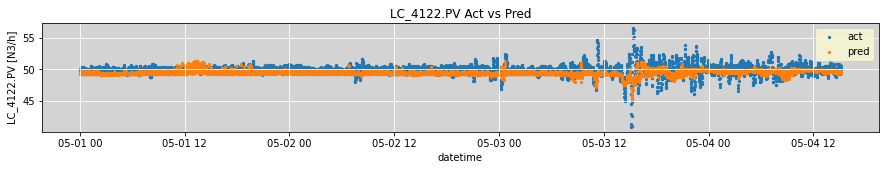

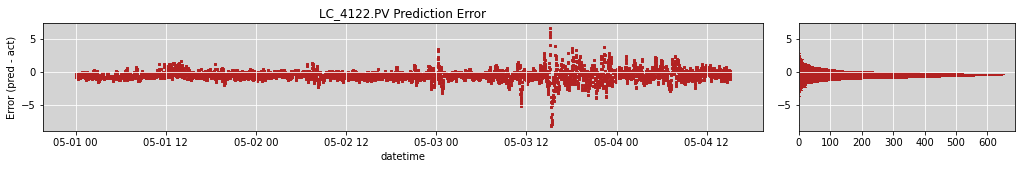


===== Cross-Validation Model : 1


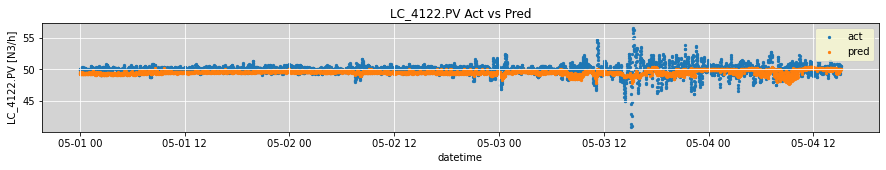

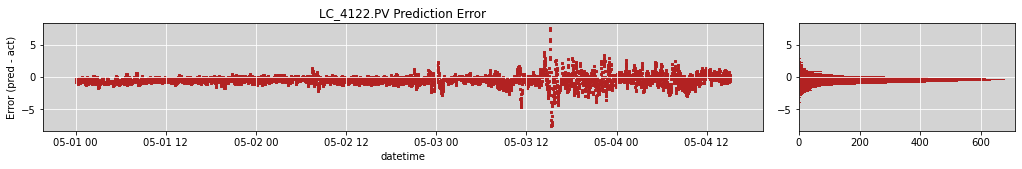


===== Cross-Validation Model : 2


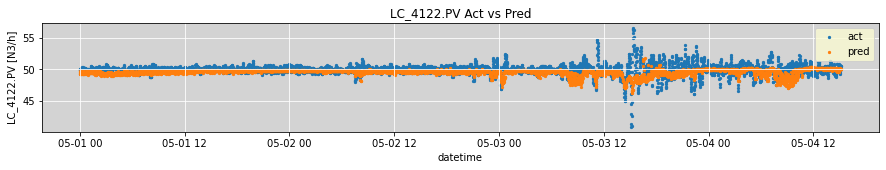

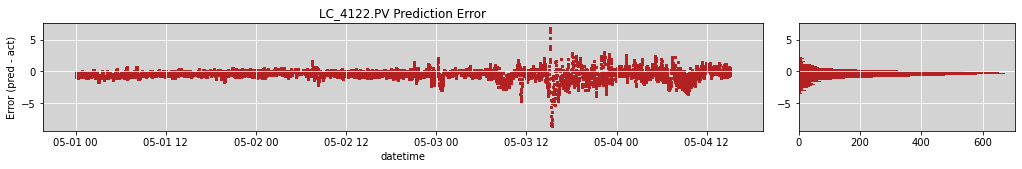


===== Cross-Validation Model : 3


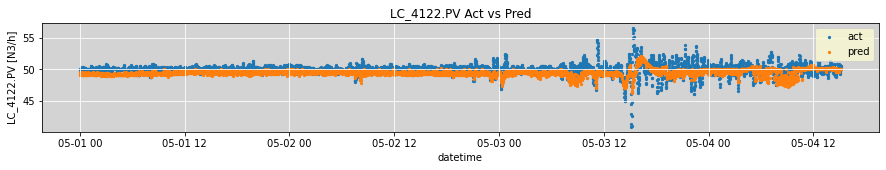

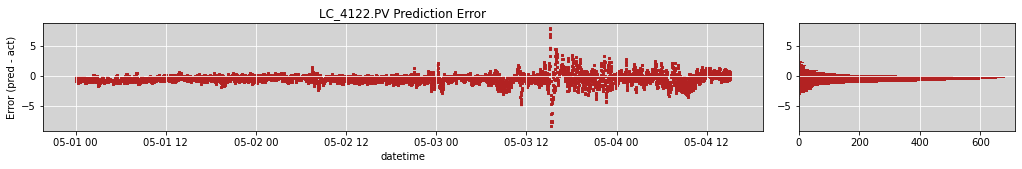

In [46]:
np_act = np.array(df_y_trial.values.reshape(-1,1))
for id_ in range(n_k):
    print('\n===== Cross-Validation Model : {}'.format(id_))
    np_pred = calc_pred(models,id_,trial_X_std)
    np_pred_inv = sc_y_train.inverse_transform(X=np_pred)
    visualize_prediction_error(x,np_act,np_pred_inv,target_col,measure_unit,error_thres=30)

# Save the model

In [47]:
# select model ID (0, 1, 2, 3)
select_model_id = 3
model = models[select_model_id]
model.save(str(select_model_id) +'_keras_nn_model_FSI4135.h5')

In [48]:
contents = '[1]: models'
pickle_models = [contents,
                 models
                ]

In [49]:
# Error with pickle
with open('models.pkl', mode='wb') as f:
    pickle.dump(pickle_models, f)

TypeError: cannot pickle 'weakref' object

In [ ]:
# call  keras model
# from keras.models import load_model
# model = load_model('keras_nn_model_fsi4135.h5')

In [ ]:
# # models load
# with open('models.pkl', mode='rb') as f:
#     pickle_in = pickle.load(f)
# models = pickle_in[1]
# ensmble_pred = calc_pred(models,-1,trial_X_std_2019_)

In [ ]:
def save_all_models(model):
    for each in range(len(models)):
        models[each].save(str(each) + '_nn_each_model_FSI4135_01.h5')
    return

In [ ]:
save_all_models(models)